In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../Capstone_project/train_NLP.csv")
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂ’s getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [3]:
data.set_index('UserName', inplace=True)
data

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...
44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
44953,89905,NaN,14-04-2020,You know itÂ’s getting tough when @KameronWild...,Positive


In [4]:
df = data[['OriginalTweet','Sentiment']]
df

,OriginalTweet,Sentiment
UserName,,
3799,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
3800,advice Talk to your neighbours family to excha...,Positive
3801,Coronavirus Australia: Woolworths to give elde...,Positive
3802,My food stock is not the only one which is emp...,Positive
3803,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
44951,Airline pilots offering to stock supermarket s...,Neutral
44952,Response to complaint not provided citing COVI...,Extremely Negative
44953,You know itÂ’s getting tough when @KameronWild...,Positive


In [5]:
df.shape

(41157, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41157 entries, 3799 to 44955
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 964.6+ KB


In [7]:
df.rename(columns = {'OriginalTweet':'text', 'Sentiment':'target'}, inplace=True)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_11656\93441688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'OriginalTweet':'text', 'Sentiment':'target'}, inplace=True)


,text,target
UserName,,
3799,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
3800,advice Talk to your neighbours family to excha...,Positive
3801,Coronavirus Australia: Woolworths to give elde...,Positive
3802,My food stock is not the only one which is emp...,Positive
3803,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
df.duplicated().sum()

0

In [9]:
df["target"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: target, dtype: int64

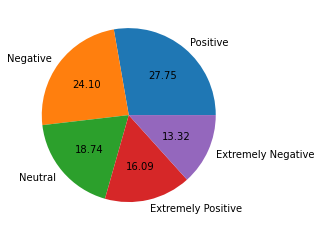

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Positive','Negative','Neutral','Extremely Positive','Extremely Negative'],
        autopct="%0.2f")
plt.show()

In [11]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df['number_of_character'] = df['text'].apply(len)
df['number_of_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['number_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\HP\AppData\Local\Temp\ipykernel_11656\2498612818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_character'] = df['text'].apply(len)
C:\Users\HP\AppData\Local\Temp\ipykernel_11656\2498612818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [13]:
df.head()

,text,target,number_of_character,number_of_sentence,number_of_words
UserName,,,,,
3799,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,1,17
3800,advice Talk to your neighbours family to excha...,Positive,237,1,38
3801,Coronavirus Australia: Woolworths to give elde...,Positive,131,1,18
3802,My food stock is not the only one which is emp...,Positive,306,4,58
3803,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,4,58


In [14]:
df[['number_of_character', 'number_of_sentence', 'number_of_words']].describe()

,number_of_character,number_of_sentence,number_of_words
count,41157.000000,41157.000000,41157.000000
mean,204.200160,2.239595,37.783196
std,68.655129,1.547043,14.306773
min,11.000000,1.000000,1.000000
25%,151.000000,1.000000,27.000000
50%,215.000000,2.000000,39.000000
75%,259.000000,3.000000,49.000000
max,355.000000,57.000000,235.000000


In [15]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [16]:
df.head()

#df['target'].value_counts()

,text,target,number_of_character,number_of_sentence,number_of_words
UserName,,,,,
3799,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3,111,1,17
3800,advice Talk to your neighbours family to excha...,4,237,1,38
3801,Coronavirus Australia: Woolworths to give elde...,4,131,1,18
3802,My food stock is not the only one which is emp...,4,306,4,58
3803,"Me, ready to go at supermarket during the #COV...",0,310,4,58


## text processing

In [17]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string

In [18]:
def transform_text(text):
    text=text.lower()#converting to lower case
    text=nltk.word_tokenize(text)#breaking the sentence to words
    a=[]
    for i in text:#To remove special charcters
        if i.isalnum():#To keep alphanumerica and alphacharcters only
            a.append(i)
    text=a[:]#cloning to attach list 
    a.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        a.append(ps.stem(i))#stemming-before loving after love
        
    return " ".join(a)#to join all the stemmed words

In [19]:
import nltk

In [20]:
#nltk.download('stopwords')

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
from nltk.corpus import stopwords

In [23]:
transform_text("i am going to bengalore and come with me")

'go bengalor come'

In [24]:
df['transformed_text'] = df['text'].apply(transform_text)

In [25]:
df.head()

,text,target,number_of_character,number_of_sentence,number_of_words,transformed_text
UserName,,,,,,
3799,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3,111,1,17,menyrbi chrisitv http http http
3800,advice Talk to your neighbours family to excha...,4,237,1,38,advic talk neighbour famili exchang phone numb...
3801,Coronavirus Australia: Woolworths to give elde...,4,131,1,18,coronaviru australia woolworth give elderli di...
3802,My food stock is not the only one which is emp...,4,306,4,58,food stock one empti pleas panic enough food e...
3803,"Me, ready to go at supermarket during the #COV...",0,310,4,58,readi go supermarket covid19 outbreak paranoid...


In [26]:
#!pip install wordcloud

Most used words in positive sentiment


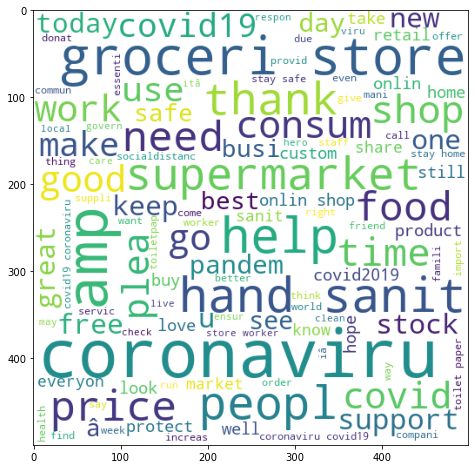

In [27]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
positive_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(positive_wc)
print("Most used words in positive sentiment")

Most used words in Negative sentiment


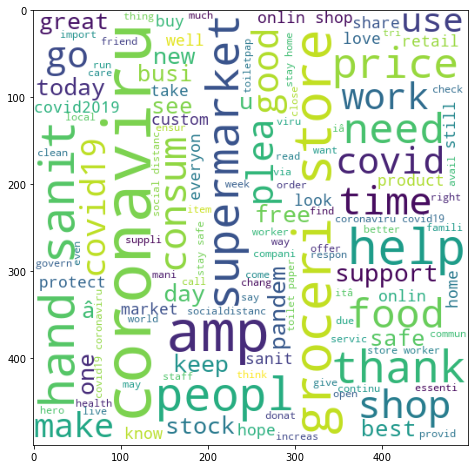

In [28]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
Negative_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(Negative_wc)
print("Most used words in Negative sentiment")

In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
bow=CountVectorizer(max_features=3000)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [31]:
X=bow.fit_transform(df['transformed_text']).toarray()#Converting sparse array to dense array
y=df['target'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print('GaussianNB')
print('accuracy_score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,  average='micro'))
print('---------------')
print('MultinomialNB')
mnb.fit(X_train,y_train)
y_pred_2=mnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))
print('precision_score',precision_score(y_test,y_pred_2, average='micro'))
print('---------------')
print('BernoulliNB')
bnb.fit(X_train,y_train)
y_pred_3=bnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_3))
print(confusion_matrix(y_test,y_pred_3))
print('precision_score',precision_score(y_test,y_pred_3, average='micro'))

GaussianNB
accuracy_score 0.35447035957240036
[[ 687   85   98  160   26]
 [ 168  756   26  308   72]
 [ 796  275  155  710   70]
 [ 174  137   31 1181   30]
 [ 452  697  104  895  139]]
precision_score 0.35447035957240036
---------------
MultinomialNB
accuracy_score 0.49271137026239065
[[539  26 361  49  81]
 [ 22 762  72  68 406]
 [370 115 853 286 382]
 [ 49  64 239 930 271]
 [ 86 466 401 362 972]]
precision_score 0.49271137026239065
---------------
BernoulliNB
accuracy_score 0.49599125364431484
[[ 520   21  369   70   76]
 [  27  706   71   75  451]
 [ 320  117  828  368  373]
 [  38   48  182 1076  209]
 [  92  401  402  439  953]]
precision_score 0.49599125364431484


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [35]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [36]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [37]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='micro')
    
    return accuracy,precision

In [38]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.2860787172011662
Precision -  0.2860787172011662
For  KN
Accuracy -  0.28352769679300294
Precision -  0.28352769679300294
For  NB
Accuracy -  0.49271137026239065
Precision -  0.49271137026239065
For  DT
Accuracy -  0.31997084548104954
Precision -  0.31997084548104954
For  LR
Accuracy -  0.6047133138969873
Precision -  0.6047133138969873
For  RF
Accuracy -  0.5595238095238095
Precision -  0.5595238095238095
For  AdaBoost
Accuracy -  0.4585762876579203
Precision -  0.4585762876579203
For  BgC
Accuracy -  0.5794460641399417
Precision -  0.5794460641399417
For  ETC
Accuracy -  0.592930029154519
Precision -  0.592930029154519
For  GBDT
Accuracy -  0.4557823129251701
Precision -  0.4557823129251701
For  xgb
Accuracy -  0.5445821185617103
Precision -  0.5445821185617103


In [39]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
4,LR,0.604713,0.604713
8,ETC,0.592930,0.592930
7,BgC,0.579446,0.579446
5,RF,0.559524,0.559524
10,xgb,0.544582,0.544582
2,NB,0.492711,0.492711
6,AdaBoost,0.458576,0.458576
9,GBDT,0.455782,0.455782
3,DT,0.319971,0.319971
0,SVC,0.286079,0.286079
